<a href="https://colab.research.google.com/github/sushily1997/ML_Assignments/blob/main/Breast_Cancer_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Principal Component Analysis (PCA) for Machine Learning**
Learn how to use PCA to reduce the dimensionality of your dataset

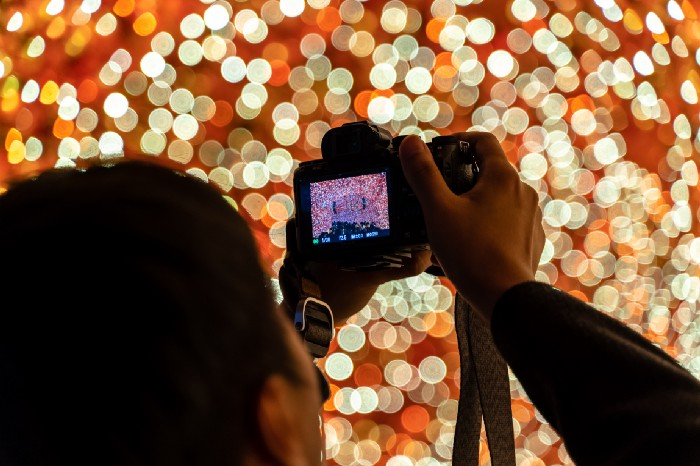

Very often in machine learning, you have high dimensionality datasets that have a large number of features. High dimensionality datasets pose a number of problems — the most common being overfitting, which reduces the ability to generalize beyond what is in the training set. As such, you should employ dimensionality reduction techniques to reduce the number of features in your dataset. **Principal Component Analysis (PCA)** is one such technique.

In this article, I will discuss PCA and how you can use it for machine learning. In particular, I will show you how to apply PCA on a sample dataset.

**What is Principal Component Analysis (PCA)?**

In short, PCA is a dimensionality reduction technique that transforms a set of features in a dataset into a smaller number of features called principal components while at the same time trying to retain as much information in the original dataset as possible:

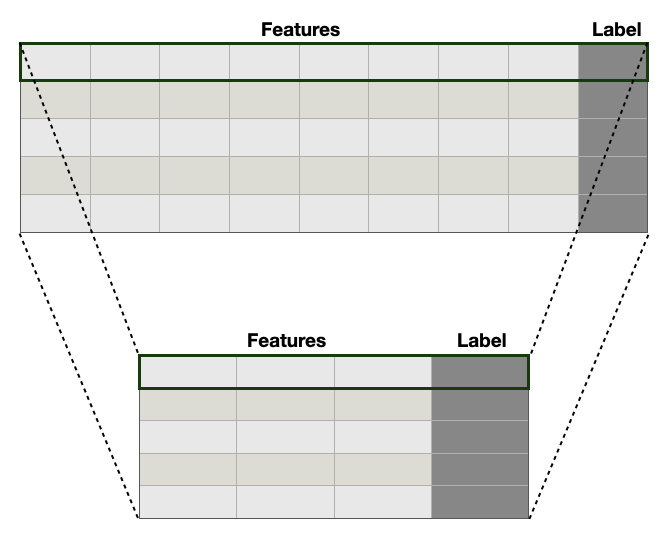

The key aim of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.

Instead of explaining the theory of how PCA works in this article, I shall leave the explanation to the following video, which provides an excellent walkthrough of how PCA works.

A good analogy of understanding PCA is imagine yourself taking a photograph. Imagine you are at a concert and you want to capture the atmosphere by taking a photo. Instead of capturing the atmosphere in 3 dimensions, a photo can only capture in 2 dimensions. While this reduction in dimension causes you to lose some details, you are still able to capture most of the information. For example, the relative size of a person in a photo tells us who is standing in front and who is standing behind. Therefore, a 2D image will still enable us to encode most of the information that would otherwise be only available in 3D:

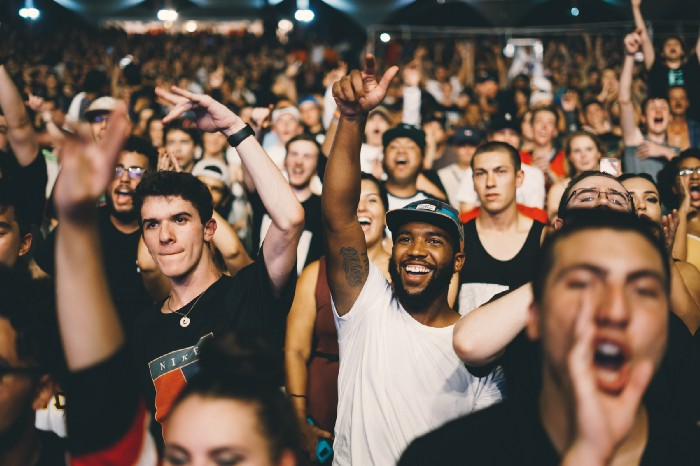

Likewise, after you applied PCA to your dataset, the reduced features (known as principal components) would still be able to adequately represent the information in the original dataset.

So what are the advantages of using PCA on your dataset? Here are several reasons why you want to use PCA:

* **Removes correlated features.** PCA will help you remove all the features that are correlated, a phenomenon known as multi-collinearity. Finding features that are correlated is time consuming, especially if the number of features is large.

* **Improves machine learning algorithm performance.** With the number of features reduced with PCA, the time taken to train your model is now significantly reduced.

* **Reduce overfitting.** By removing the unnecessary features in your dataset, PCA helps to overcome overfitting.

On the other hand, PCA has its disadvantages:

* **Independent variables are now less interpretable.** PCA reduces your features into smaller number of components. Each component is now a linear combination of your original features, which makes it less readable and interpretable.

* **Information loss.** Data loss may occur if you do not exercise care in choosing the right number of components.
Feature scaling. Because PCA is a variance maximizing exercise, PCA requires features to be scaled prior to processing.
PCA is useful in cases where you have a large number of features in your dataset.

In Machine Learning, PCA is an unsupervised machine learning algorithm.

##**Using the Sample Dataset**

For this article, I am going to demonstrate PCA using the classic breast cancer dataset available from sklearn:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()


The breast cancer dataset is a good example to illustrate PCA as it has a large number of features and that all the features’s data type are floating point numbers. Let’s print the feature names and the number of features in this dataset:

In [ ]:
print(breast_cancer.feature_names)
print(len(breast_cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


Let’s also print out the target and examine the meaning of the target and the distribution of the target:

In [ ]:

print(breast_cancer.target) 
print(breast_cancer.target_names) 
print(np.array(np.unique(breast_cancer.target, return_counts=True)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

A target value of 0 means that the tumour is malignant while 1 means it is benign. The target is imbalanced, but not to a serious extent.

**Examining the Relationship between Features and Target**

At this juncture, it is useful to be able to visualize how each feature affects the diagnosis — whether a tumor is malignant or benign. So let’s plot a histogram for each feature and then differentiate the malignant and benign tumors using color:



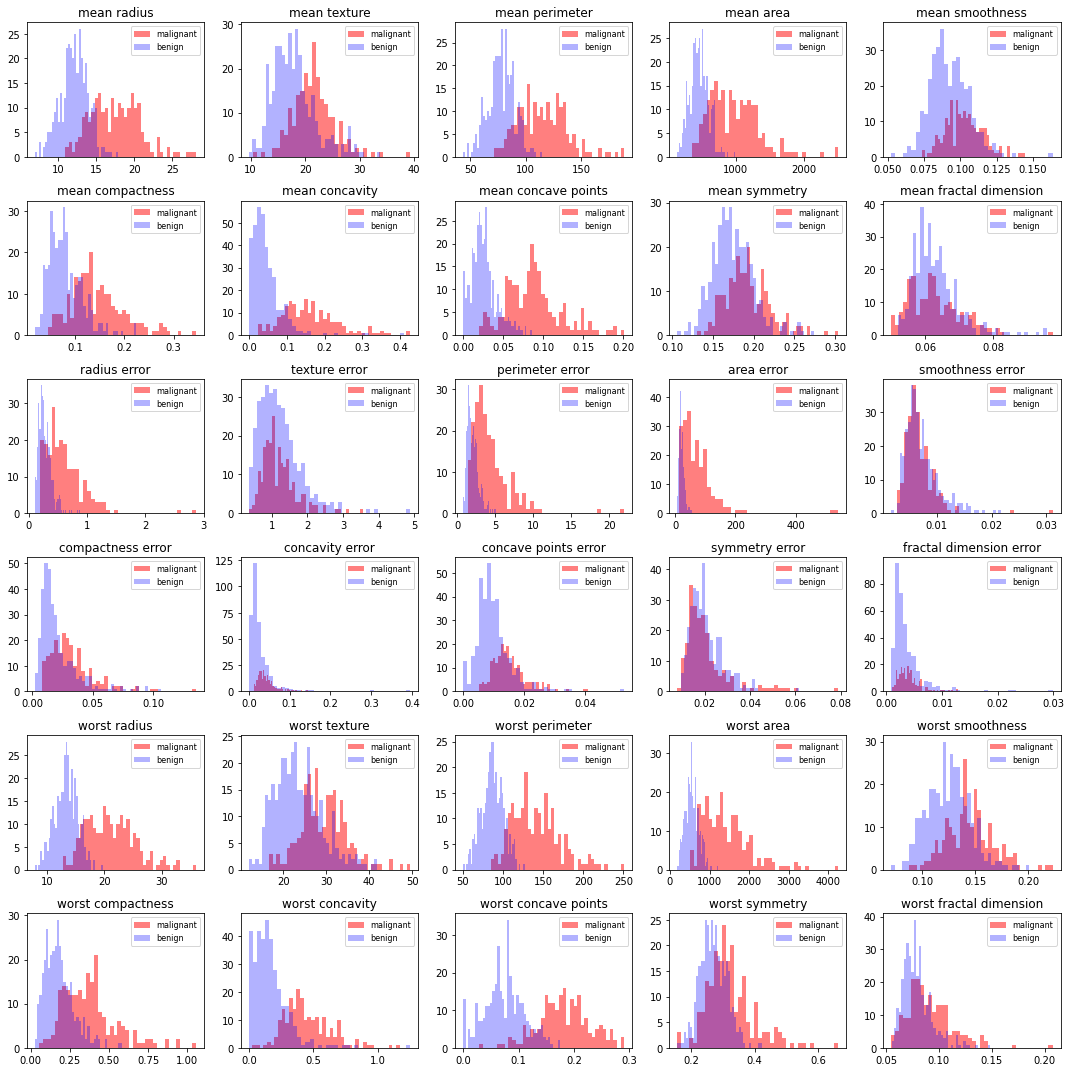

In [ ]:
_, axes = plt.subplots(6,5, figsize=(15, 15))
malignant = breast_cancer.data[breast_cancer.target==0]
benign = breast_cancer.data[breast_cancer.target==1]
ax = axes.ravel()                     # flatten the 2D array
for i in range(30):                   # for each of the 30 features
    bins = 40
    #---plot histogram for each feature---
    ax[i].hist(malignant[:,i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color='b', alpha=0.3)
    #---set the title---
    ax[i].set_title(breast_cancer.feature_names[i], fontsize=12)    
    #---display the legend---
    ax[i].legend(['malignant','benign'], loc='best', fontsize=8)
    
plt.tight_layout()
plt.show()

For each feature, if two histograms are separate, this means that the feature is important and it directly affects the target (diagnosis). For example, if you look at the histogram for the **mean radius** feature, you will observe that the larger the tumour, the more likely that the tumor is malignant (red):

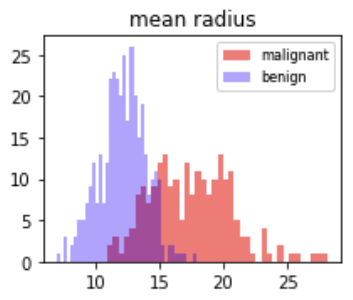

On the other hand, the **smoothness error** feature doesn’t really tell you whether a tumor is malignant or benign:

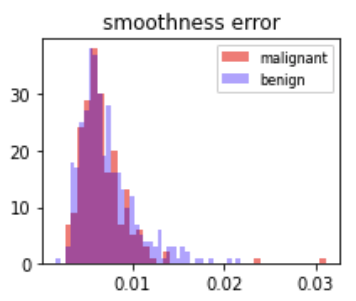

##**Loading the Data Into a DataFrame**
The next step would be to load the breast cancer data into a Pandas DataFrame:

In [ ]:
df = pd.DataFrame(breast_cancer.data, 
                  columns = breast_cancer.feature_names)
df['diagnosis'] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


**Method 1 — Training the Model using all the Features**

Before we perform PCA on the dataset, let’s use logistic regression to train a model using all the 30 features in the dataset and see how well it performs:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]      
y = df.iloc[:,-1]
#---perform a split---
random_state = 12
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,
                     shuffle = True,
                     random_state=random_state)
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)
#---evaluate the model---
log_reg.score(X_test,y_test)

0.9239766081871345

##**Method 2 — Training the Model using Reduced Features**
For the next method, let’s examine the various features and try to eliminate those features that are least correlated to the target. At the same time, we also want to remove those features that exhibit muli-collinearity. The aim is to reduce the number of features and see if the accuracy of the model can be improved.

##**Getting the Correlation Factors**
Let’s first get the correlation of each feature with respect to the target (diagnosis):

In [ ]:
df_corr = df.corr()['diagnosis'].abs().sort_values(ascending=False)
df_corr

diagnosis                  1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

We then extract all those features that have relatively high correlation to the target (we arbitrarily set the threshold to 0.6):



In [ ]:
# get all the features that has at least 0.6 in correlation to the 
# target
features = df_corr[df_corr > 0.6].index.to_list()[1:]
features                          # without the 'diagnosis' column

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity',
 'worst concavity']

But it is clear that several features are correlated — for example, radius, perimeter, and area are all correlated. Some of these features must be removed.

##**Checking for MultiCollinearity**
Let’s remove those features that exhibits multi-collinearity:

In [ ]:
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df,features)

,VIF,Tolerance
worst concave points,17.130560,0.058375
worst perimeter,204.329679,0.004894
mean concave points,34.546872,0.028946
worst radius,391.471018,0.002554
mean perimeter,1519.882563,0.000658
worst area,169.931222,0.005885
mean radius,1606.575820,0.000622
mean area,200.004550,0.005000
mean concavity,30.806430,0.032461
worst concavity,14.417687,0.069359


Your aim would be to remove those features that have VIF greater than 5. You can iteratively call the calculate_vif() function with different features until you have a feature-set that has all VIF values lesser than 5.

With some tries, I have narrowed down to 3 features:

In [ ]:
# try to reduce those feature that has high VIF until each feature 
# has VIF less than 5
features = [
    'worst concave points',
    'mean radius',
    'mean concavity',
]
calculate_vif(df,features)

,VIF,Tolerance
worst concave points,4.759243,0.210117
mean radius,2.266584,0.441193
mean concavity,3.917617,0.255257


#**Training the Model**
With the 30 features reduced to 3, let’s now train the model using logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.loc[:,features]            # get the reduced features in the 
                                  # dataframe
y = df.loc[:,'diagnosis']
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size = 0.3,
                     shuffle = True,                                                    
                     random_state=random_state)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.847953216374269

##**Method 3 — Training the Model using Reduced Features (PCA)**
Finally, let’s apply PCA to the dataset and see if a better model can be trained.

##**Performing Standard Scaling**
Remember that PCA is sensitive to scaling? So the first step is to perform a standard scaling on the 30 features:

In [ ]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

##**Applying Principal Component Analysis (PCA)**
You can now apply PCA to the features using the PCA class in the sklearn.decomposition module:

In [ ]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

The initializer of the PCA class has a parameter named n_components. You can supply it one of the following values:

* an integer to indicate how many principal components you want to reduce the features to.

* a floating-point number between 0<n<1 and it will return the number of components needed to capture the specified percentage of variability in the data. For example, if you want to find the number of components needed to capture 85% of the variability of the data, pass 0.85 to the n_components parameter.

* None. In this case, the number of components returned will be the same as the number of original features in the dataset

Once the components are determined using the fit() method, you can print out the explained variances:

In [ ]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]



So how do you interpret the above output? You can interpret it as follows:

* The first component alone captures about 44% variability in the data
* The second one captures about 19% variability in the data and so on.
* The 30 components altogether capture 100% variability in the data.

A much easier way to understand the above result is to print the cumulative variances:

In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()


Cumulative Variances (Percentage):
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]



You can now interpret the cumulative variances as follows:

* The first component alone captures about 44% variability in the data
* The first two components capture about 63% variability in the data and so on.
* The first 8 components together capture about 92.6% variability in the data.

A visual way to view the cumulative variances is to plot a scree plot.

A scree plot is a line plot of the principal components.

Text(0, 0.5, 'Explained variance (%)')

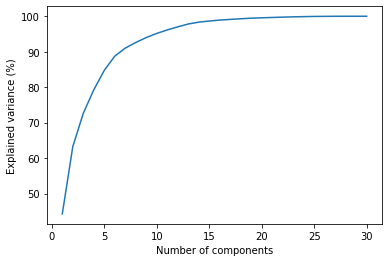

In [ ]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Let’s now apply PCA to find the desired number of components based on the desired explained variance, say 85%:

Cumulative Variances (Percentage):
[44.27202561 63.24320765 72.63637091 79.23850582 84.73427432 88.75879636]
Number of components: 6


Text(0, 0.5, 'Explained variance (%)')

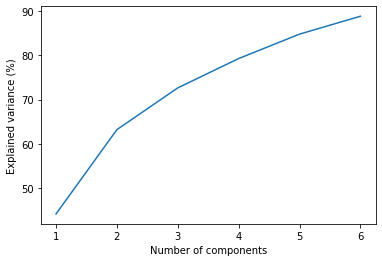

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

You can also find out the importance of each feature that contributes to each of the components using the components_ attribute of the pca object:

In [ ]:
pca_components = abs(pca.components_)
print(pca_components)

[[2.18902444e-01 1.03724578e-01 2.27537293e-01 2.20994985e-01
  1.42589694e-01 2.39285354e-01 2.58400481e-01 2.60853758e-01
  1.38166959e-01 6.43633464e-02 2.05978776e-01 1.74280281e-02
  2.11325916e-01 2.02869635e-01 1.45314521e-02 1.70393451e-01
  1.53589790e-01 1.83417397e-01 4.24984216e-02 1.02568322e-01
  2.27996634e-01 1.04469325e-01 2.36639681e-01 2.24870533e-01
  1.27952561e-01 2.10095880e-01 2.28767533e-01 2.50885971e-01
  1.22904556e-01 1.31783943e-01]
 [2.33857132e-01 5.97060883e-02 2.15181361e-01 2.31076711e-01
  1.86113023e-01 1.51891610e-01 6.01653628e-02 3.47675005e-02
  1.90348770e-01 3.66575471e-01 1.05552152e-01 8.99796818e-02
  8.94572342e-02 1.52292628e-01 2.04430453e-01 2.32715896e-01
  1.97207283e-01 1.30321560e-01 1.83848000e-01 2.80092027e-01
  2.19866379e-01 4.54672983e-02 1.99878428e-01 2.19351858e-01
  1.72304352e-01 1.43593173e-01 9.79641143e-02 8.25723507e-03
  1.41883349e-01 2.75339469e-01]
 [8.53124284e-03 6.45499033e-02 9.31421972e-03 2.86995259e-02
  1.

The importance of each feature is reflected by the magnitude of the corresponding values in the output — the higher magnitude, the higher the importance. The following figure shows how you can interpret the results above:

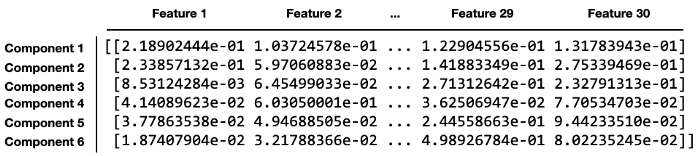

For curiosity, let’s print out the top 4 features that contributes the most to each of the 6 components:

In [ ]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['mean concave points', 'mean concavity', 'worst concave points', 'mean compactness']
Component 1: ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension', 'mean radius']
Component 2: ['texture error', 'smoothness error', 'symmetry error', 'worst symmetry']
Component 3: ['worst texture', 'mean texture', 'texture error', 'mean smoothness']
Component 4: ['mean smoothness', 'concavity error', 'worst smoothness', 'mean symmetry']
Component 5: ['worst symmetry', 'symmetry error', 'worst smoothness', 'mean symmetry']


##**Transforming all the 30 Columns to the 6 Principal Components**
You can now transform the standardized data of the 30 columns in the dataset to the 6 principal components:

In [ ]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(569, 6)
[[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012  1.41142445]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498  0.02865635]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859   0.54145215]
 ...
 [ 1.25617928 -1.90229671  0.56273053 -2.08922702  1.80999133 -0.53444719]
 [10.37479406  1.67201011 -1.87702933 -2.35603113 -0.03374193  0.56793647]
 [-5.4752433  -0.67063679  1.49044308 -2.29915714 -0.18470331  1.61783736]]


##**Creating a Machine Learning Pipeline**
Let’s now create a machine learning pipeline so that we can formalize the entire process:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

We then split the dataset into training and testing sets and train the model using the training set:

In [ ]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', LogisticRegression())])

And let’s score the model to see how it performs:



In [ ]:
log_regress_model.score(X_test,y_test)


0.9707602339181286

##**Summary**
In this article, we have discussed the idea behind PCA and the pros and cons of using it. In particular, we trained three models:

Using all the 30 features in the breast cancer dataset
Using only 3 feature in the dataset
Applying PCA to the dataset and then use the 6 components for training
For your own dataset, it would be useful to try out the various methods that I have demonstrated in this article and see which one performs better.